<table style="background-color:#F5F5F5;" width="100%">
<tr><td style="background-color:#F5F5F5;"><img src="../images/logo.png" width="150" align='right'/></td></tr>     <tr><td>
            <h2><center>Aprendizagem Automática em Engenharia Biomédica</center></h2>
            <h3><center>1st Semester - 2024/2025</center></h3>
            <h4><center>Universidade Nova de Lisboa - Faculdade de Ciências e Tecnologia</center></h4>
</td></tr>
    <tr><td><h2><b><center>Lab 9 - Feature Selection and Dimensionality Reduction</center></b></h2>
    <h4><i><b><center>Human Activity Recognition Dataset</center></b></i></h4></td></tr>
</table>

## 1. Introduction
In machine learning, data often comes with numerous features, especially in fields like biomedical engineering where high-dimensional data is common. Biomedical datasets may include genetic expressions, imaging pixels, or signals from various sensors, resulting in hundreds or thousands of variables to analyze. While these high-dimensional datasets provide rich information, they also introduce challenges that can hinder the performance and interpretability of machine learning models. Therefore, techniques that allow for the reduction exist. The two main methods that are employed are: __Feature Selection__ and __Dimensionality Reduction__.

### 1.1 Importance of Feature Selection and Dimensionality Reduction
High-dimensional data can be challenging for several reasons:

__1. Curse of Dimensionality__: As the number of features increases, the volume of the data space grows exponentially. This makes it harder for models to generalize, as data points in high-dimensional spaces are often sparse and distant from each other. This issue can lead to overfitting, where models perform well on training data but poorly on new data.

__2. Increased Computational Complexity__: The more features a dataset has, the more computational resources are needed to process it. This can slow down training and inference times, especially when working with large datasets.

__3. Interpretability__: In biomedical engineering, it’s often essential to interpret models for clinical decision-making. Reducing features to a smaller set of informative variables can help clarify which variables are most relevant, making the model easier to understand and validate.

<div style="text-align:center;">
<img src="https://drek4537l1klr.cloudfront.net/rhys/Figures/fig13-1_alt.jpg" width="600"/>
</div>

### 1.2 Feature Selection vs. Dimensionality Reduction
While both feature selection and dimensionality reduction reduce the number of features in the input space, they follow a different approach to retain relevant information.

__1. Feature Selection__: Involves __selecting a subset of the original features without transforming them__. This approach is especially useful when we want to keep the original variables for interpretability, as in cases where specific biomarkers or sensor readings need to be clearly defined. Feature selection methods include:

* __Filter Methods__: Select features based on their statistical properties, like correlation or variance. These methods analyse the data structure and find independence among the feature set.

* __Wrapper Methods__: Iteratively evaluate feature subsets based on model performance, such as recursive feature elimination.

* __Embedded Methods__: Include feature selection as part of the model training process, for instance, using regularization to set certain feature coefficients to zero.

__2. Dimensionality Reduction__: Involves __transforming data into a new, lower-dimensional space__. Unlike feature selection, this process typically creates new variables (combinations of the original ones) to retain as much of the original data's structure as possible. Dimensionality reduction is valuable for capturing patterns in complex data and improving visualization. Common techniques include:

* __Principle Component Analysis (PCA)__: Finds linear combinations of features that capture the greatest variance in the data.
* __Linear Discriminant Analysis (LDA):__ A supervised technique that maximizes separability between classes.
* __Nonlinear Methods (e.g., t-SNE, UMAP)__: Useful for visualizing complex structures in high-dimensional data by preserving local patterns in a lower-dimensional space.

### 1.3 When to Use Feature Selction vs. Dimensionality Reduction
In practice, the choice between feature selection and dimensionality reduction depends on the goal. However, there are also scenarios were both are used together:

* __Feature Selection__: Is preferable when maintaining the original features’ interpretability is important. It’s often used in clinical and biomedical contexts where individual variables (e.g., specific biomarkers or measurements) need to be directly interpreted.

* __Dimensionality Reduction__: Is useful when the focus is on capturing underlying patterns or reducing the data’s complexity for modeling. It’s commonly applied in exploratory analysis and when visualization is important, especially in high-dimensional data spaces.

### 1.4 Goal of Today's Class
In today’s class, we will explore both feature selection and dimensionality reduction techniques. By the end, you should be able to:

* Understand the key differences between feature selection and dimensionality reduction.
* Apply several feature selection methods to identify relevant features in biomedical datasets.
* Implement dimensionality reduction techniques like PCA to simplify complex data while retaining important structures.

## 2. Feature Selection
### 2.1. The UCI Human Activity Recognition Using Smartphones Dataset 

Today, we will focus again on the [UCI's Human Activity Recognition dataset](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones). To simplify things we will use the data in an already prepared format, meaning that we will use the features that we extracted using [TSFEL](https://tsfel.readthedocs.io/en/latest/) in Labs 6 (Decision Trees) and 7 (Model Optimization) that have already been split into training and test sets. The files containing the extracted features are available on our GitHub page, thus we will load them directly from there.

In [1]:
# -- imports of packages needed for this notebook -- #
import numpy as np
import pandas as pd
from typing import Union, List

In [2]:
# load the train test data from the github
X_train = pd.read_csv("https://raw.githubusercontent.com/hgamboa/nova-aaeb/main/Labs/Data/HAR/train_features.csv")
X_test = pd.read_csv("https://raw.githubusercontent.com/hgamboa/nova-aaeb/main/Labs/Data/HAR/test_features.csv")
y_train = np.loadtxt("https://raw.githubusercontent.com/hgamboa/nova-aaeb/main/Labs/Data/HAR/y_train.txt")
y_test = np.loadtxt("https://raw.githubusercontent.com/hgamboa/nova-aaeb/main/Labs/Data/HAR/y_test.txt")

In [3]:
# show the first couple of rows of the DataFrame
X_train.head()

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Average power,0_Centroid,0_ECDF Percentile_0,0_ECDF Percentile_1,0_Entropy,0_Fundamental frequency,0_Histogram mode,...,0_Wavelet variance_1.39Hz,0_Wavelet variance_1.56Hz,0_Wavelet variance_1.79Hz,0_Wavelet variance_12.5Hz,0_Wavelet variance_2.08Hz,0_Wavelet variance_2.5Hz,0_Wavelet variance_3.12Hz,0_Wavelet variance_4.17Hz,0_Wavelet variance_6.25Hz,0_Zero crossing rate
0,259.890979,5.077614,2.0,52.186944,2.491166,1.017970,1.021503,0.994979,0.2,1.019271,...,0.188684,0.151950,0.119013,0.002725,0.089012,0.063075,0.041148,0.023611,0.010743,0.0
1,260.268187,5.081266,2.0,52.262688,2.489955,1.018847,1.022127,0.993974,1.2,1.019292,...,0.189054,0.152212,0.119177,0.002717,0.089110,0.063129,0.041158,0.023567,0.010654,0.0
2,260.573449,5.084253,2.0,52.323986,2.490098,1.018936,1.022978,0.994979,0.4,1.019080,...,0.190180,0.153175,0.119917,0.002705,0.089605,0.063413,0.041337,0.023710,0.010695,0.0
3,257.841406,5.057421,50.0,51.775383,2.474624,1.008202,1.022075,0.997991,0.2,1.021267,...,0.185809,0.149821,0.117546,0.002694,0.088081,0.062511,0.040846,0.023444,0.010604,0.0
4,254.979930,5.029348,2.0,51.200789,2.490372,1.007846,1.011979,0.995983,0.2,1.009506,...,0.184246,0.148244,0.115992,0.002674,0.086739,0.061593,0.040401,0.023303,0.010539,0.0


__Exercise 1__: 

To compare different feature selection methods effectively, we need to use a consistent evaluation approach. Therefore, we should use the same classifier, under the same conditions, to evaluate the results.

__Tasks__:
* Define a function using the __tuned decision tree from the previous experiments on the HAR dataset__.
* The function should be designed to train the model, make predictions, and then display the performance results.
* Additionally, it should provide information about the number of features to help evaluate the model's complexity.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def train_and_evaluate_decision_tree(X_train: Union[np.ndarray, pd.DataFrame], y_train: np.ndarray, 
                                     X_test: Union[np.ndarray, pd.DataFrame], y_test: np.ndarray) -> None:
    """
    Train a Decision Tree classifier and evaluate its performance on training and test sets.

    :param X_train: Union[np.ndarray, pd.DataFrame]
        Feature matrix for training data, either as a NumPy array or a pandas DataFrame.
    :param y_train: np.ndarray
        Labels for training data.
    :param X_test: Union[np.ndarray, pd.DataFrame]
        Feature matrix for test data, either as a NumPy array or a pandas DataFrame.
    :param y_test: np.ndarray
        Labels for test data.
    
    :return: None
        Prints the performance metrics and model complexity.
    
    The function initializes a Decision Tree classifier with specific hyperparameters
    and trains it on the provided training data. It then predicts the labels for both
    training and test sets, calculates accuracy scores for each, and prints the model's
    performance and feature complexity.
    """
    
    # Initialize Decision Tree classifier with specified hyperparameters
    decision_tree_model = DecisionTreeClassifier(
        criterion='entropy',
        max_depth=5,
        max_features=100,
        max_leaf_nodes=30,
        min_samples_leaf=25,
        min_samples_split=50,
        random_state=42
    )
    
    # Train the model on the training dataset

    
    # Predict on both training and test datasets

    
    # Print model performance metrics
    print("Performance:")
    print("\tTrain Accuracy:", ))
    print("\tTest  Accuracy:", ))
    
    # Print model complexity in terms of the number of features
    print("Complexity:")
    print("\tNumber of Features Used:", )

__Exercise 2__: 

Verify the baseline performance, using the original dataset.

### 2.2. Filter Methods
Filter methods are a type of feature selection technique used to select the most relevant features in a dataset __before__ training a machine learning model. As opposed to __wrapper and embedded methods__ that rely on model performance to evaluate feature importance, __filter methods__ use statistical measures to assess the relevance of each feature __independently of any specific model__. This can make them computationally efficient and useful in cases where we want a quick assessment of feature relevance.

Filter methods rely on various metrics, like variance and correlation, to assess the importance of features. The goal is to reduce dimensionality while retaining as much relevant information as possible.

When employing filter methods the following should be regarded:
* __Pros__:
    >* Computationally efficient and scalable for high-dimensional data.
    >* Provides an initial reduction in feature space without requiring a model.
    >* Helps prevent overfitting by removing irrelevant or redundant features.

* __Cons__:
    >* Ignores feature interactions, as features are evaluated independently.
    >* Can sometimes exclude features that may be important within the context of a specific model.

### 2.2.1 Variance Thresholding
This method removes features with low variances, as a feature with a low variance (i.e., a feature that has nearly the same value in all samples) contributes less to model performance. In scikit-learn removing features with low variance can be done using the class:

* [__VarianceThreshold()__](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html)

__Exercise 3__:

Let's explore if there are any features with low variance in our feature set.

__Tasks__:

* Remove features with low variance from the feature set using a variance __threshold=0.1__, meaning that features that have a variance __below__ this threshold should be removed.
* Convert the output of the VarianceThreshold transformation back to a pandas.DataFrame object using the names of the retained features as column names.
* Print the amount of features that were removed from the feature set.
* Print the name of the features that were retained.

__Hints__:
* the `.get_support()` function of the VairanceThreshold object allows you to get the feature names.

__Exercise 4__:

Now that you know which features express higher variance you can see if the new features set improves the decision tree model.

__Tasks__:
* Remove the features with low variance from the test set. These should be exactly the same that have been removed from the training set.
* Train and evaluate the decision tree model using the new features using the function you implemented above.

### 2.2.2 Correlation-Based Selection

In correlation-based feature selection we can perform two distinct tests:

__1. Feature vs. Feature__: Check the correlation between all features, using, among others: 
* Pearson correlation
* Spearman's rank correlation
* Kendall tau correlation

__2. Feature vs. Target__: Check the correlation between each feature and the target, using, among others: 
* Chi-square test,
* Mutual Information
* ANOVA F-value

#### 2.2.2.1 Implementing the Feature vs. Feature approach
In this notebook we __will only discuss a Feature vs. Feature__ approach. For the second approach, we recommend having a look at scikit-learn's [__SelectKBest__](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html).
In case of a Feature vs. Feature apporach: If we, for example, find two features that are highly correlated, we could remove one of them from the feature set, as the second feature does not provide any information gain for the model. 

Depending on the features you have in your dataset, the appropriate correlation metric needs to be chosen:
* __Continuous Features__: For pairs of continuous features, __Pearson correlation__ is typically used. Pearson’s correlation coefficient measures the linear relationship between two variables, where values close to +1 or -1 indicate high correlation. Depending on the properties of the data other correlation such as __Spearman's rank__ and __Kendall's tau__ can also be explored.
* __Binary or One-Hot Encoded Features__: When working with binary features (0 and 1 values) or one-hot encoded features, __Spearman’s rank correlation__ or __Phi coefficient__ (a specific case of Pearson correlation for binary data) can be used. Spearman's rank correlation, which assesses monotonic relationships, is often more stable than Pearson's for binary features, while the Phi coefficient is specifically tailored to binary pairs.
* __Binary vs. Continuous Features__: For mixed pairs (one binary and one continuous feature), __Point-Biserial correlation__ is often used. This metric can measure the association between a binary feature and a continuous one, helping identify correlations that might exist between these different types.

As the features we extracted from the HAR dataset consist of __continuous features we will explore correlation using Peasons correlation__. For calculating correlation between features we can use __pandas__, as it implements a function that calculates the correlation between all columns:
* [DataFrame.corr()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

The function returns a correlation matrix that can be visualized. For that we will use the statistical data visualization package [__seaborn__](https://seaborn.pydata.org/), which was built on top of matplotib. To make this code reusable, we will wrap the logic for plotting the correlation matrix into a function.

_Note_: the plot does not show the labels for all features due to space restrictions.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_heatmap(correlation_matrix: pd.DataFrame, figsize: tuple = (16, 14), cmap=plt.cm.Reds) -> None:
    """
    Plots a heatmap of the correlation matrix to visualize the correlation between features.
    
    :param correlation_matrix: pd.DataFrame
        A DataFrame representing the correlation matrix of the dataset features.
    :param figsize: tuple, optional
        A tuple specifying the figure size in inches (width, height).
        Default is (16, 14).
    :param cmap: matplotlib.colors.Colormap, optional
        The colormap for the heatmap. Default is `plt.cm.Reds`.
    
    :return: None
    """
    # Initialize the plot with the specified figure size
    plt.figure(figsize=figsize)
    
    # Plot the heatmap using Seaborn
    sns.heatmap(data=correlation_matrix, cmap=cmap, vmin=-1, vmax=1)
    
    # Set title and labels for readability
    plt.title("Correlation Heatmap")
    plt.xlabel("Features")
    plt.ylabel("Features")
    
    # Display the plot
    plt.show()

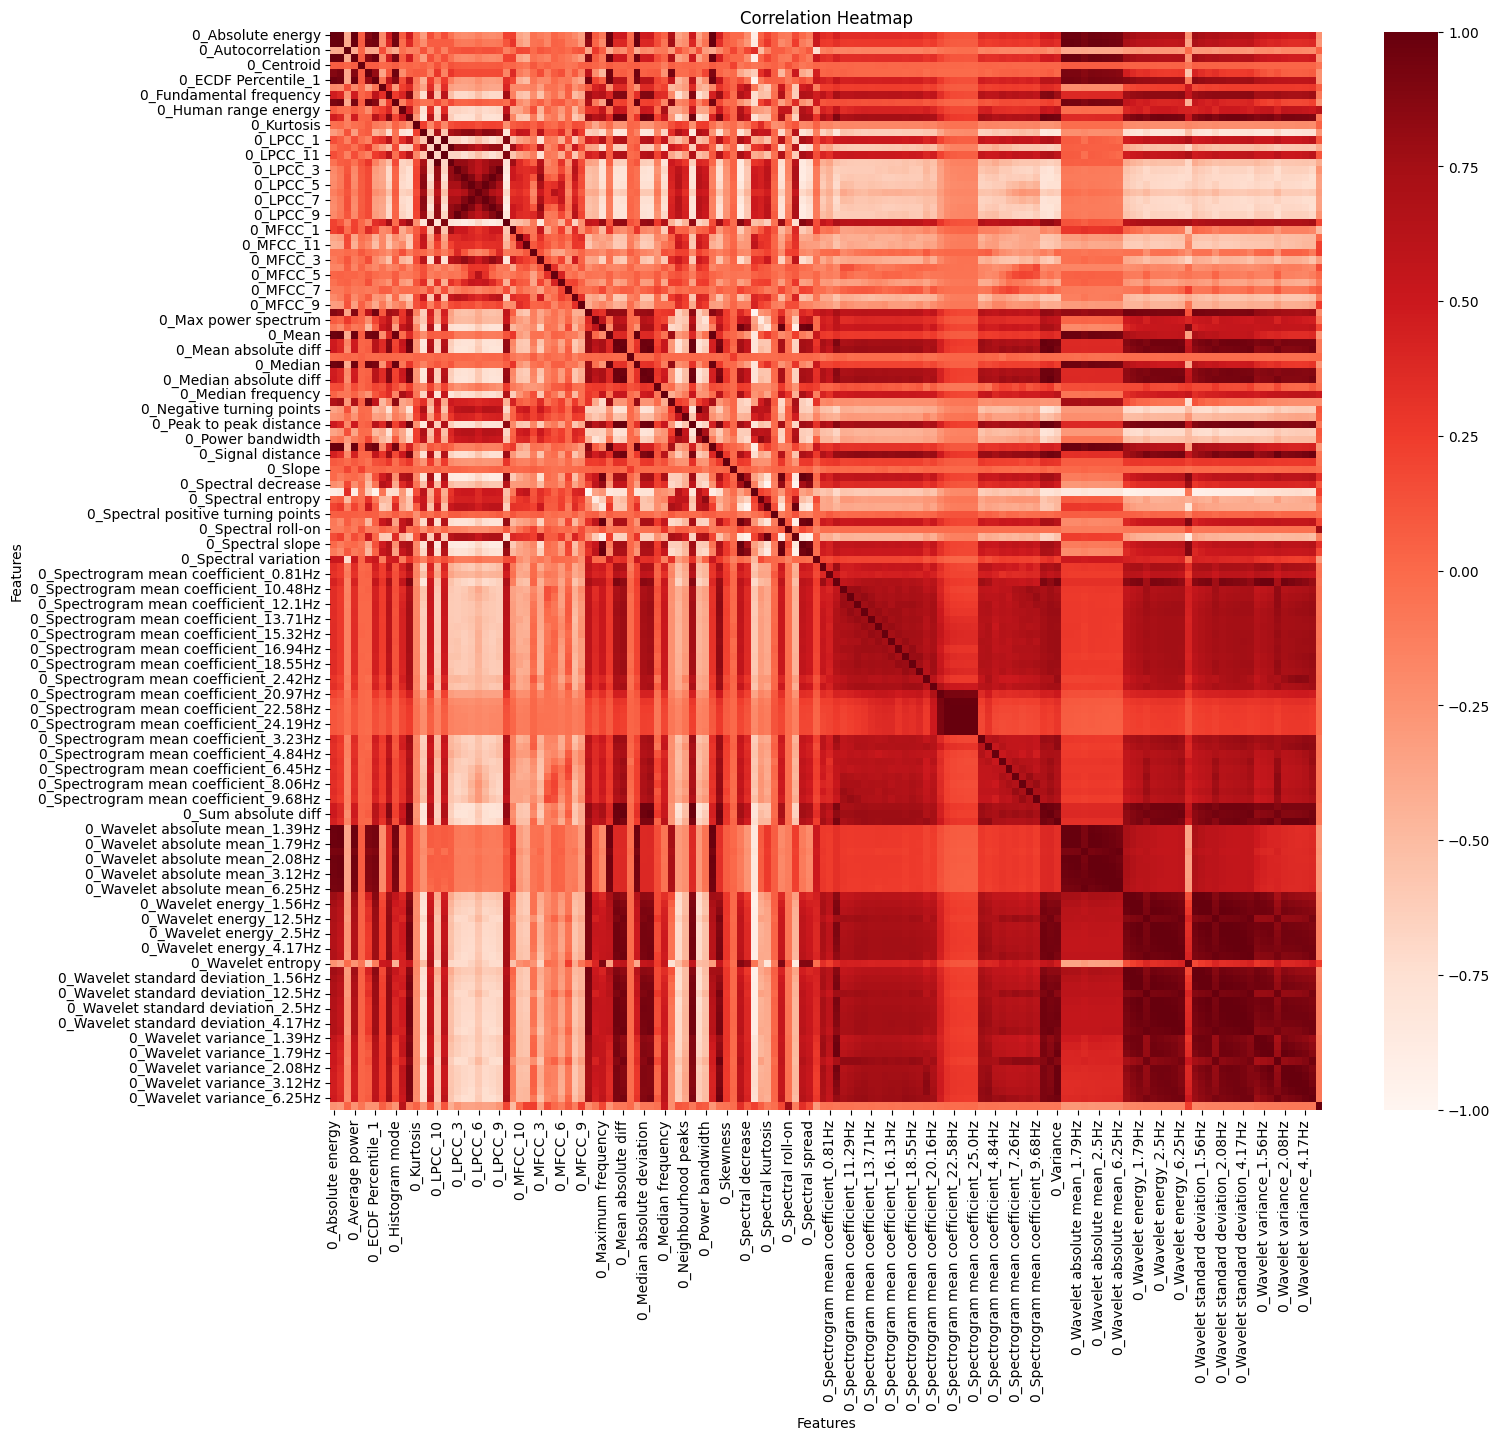

In [5]:
# calculate the correlation matrix on the train data using pearson correlation (this code will take some time to run)
pearson_corr_matrix = X_train.corr(method='pearson')

# plot the correlation matrix
plot_correlation_heatmap(pearson_corr_matrix)

With the correlation matrix visualized, we can see that there are indeed some feature pairs that are correlated (the darker the shade of red, the higher the correlation). Thus, we now should remove one of the features that is part of a correlated pair.

Here again, we can do this by defining a threshold, and only keep one feature from the pairs that are __above__ that threshold. For this purpoes we will define a method to identify the most correlated features using a reference threshold of __0.95__.

In [6]:
def get_correlated_features(correlation_matrix: pd.DataFrame, threshold: float = 0.95) -> List[str]:
    """
    Identifies features in a correlation matrix that have a correlation coefficient above a specified threshold.
    Returns a list of feature names that are highly correlated and may be redundant.

    :param correlation_matrix: pd.DataFrame
        The correlation matrix of the dataset, with feature names as both columns and index.
    :param threshold: float, optional
        The correlation threshold above which features are considered highly correlated.
        Default is 0.95.
        
    :return: List[str]
        A list of feature names that have high correlations above the specified threshold.
    """
    # Take the absolute value of the correlation matrix for consistency
    abs_corr_matrix = correlation_matrix.abs()
    
    # Select the upper triangle of the correlation matrix to avoid duplicate pairs
    upper_triangle = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(bool))
    
    # Identify features with any correlation higher than the threshold
    correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    
    return correlated_features

In [7]:
corr_features = get_correlated_features(pearson_corr_matrix, threshold=0.95)

print("No. correlated features: {}".format(len(corr_features)))
print("The correlated features are:")
corr_features

No. correlated features: 67
The correlated features are:


['0_Area under the curve',
 '0_Average power',
 '0_ECDF Percentile_1',
 '0_Histogram mode',
 '0_LPCC_11',
 '0_LPCC_2',
 '0_LPCC_7',
 '0_LPCC_8',
 '0_LPCC_9',
 '0_Mean',
 '0_Mean absolute deviation',
 '0_Mean absolute diff',
 '0_Median',
 '0_Median absolute deviation',
 '0_Median absolute diff',
 '0_Peak to peak distance',
 '0_Positive turning points',
 '0_Root mean square',
 '0_Signal distance',
 '0_Spectral centroid',
 '0_Spectral distance',
 '0_Spectral kurtosis',
 '0_Spectral roll-off',
 '0_Spectral skewness',
 '0_Spectral slope',
 '0_Spectral spread',
 '0_Spectrogram mean coefficient_22.58Hz',
 '0_Spectrogram mean coefficient_23.39Hz',
 '0_Spectrogram mean coefficient_24.19Hz',
 '0_Spectrogram mean coefficient_25.0Hz',
 '0_Standard deviation',
 '0_Sum absolute diff',
 '0_Variance',
 '0_Wavelet absolute mean_1.39Hz',
 '0_Wavelet absolute mean_1.56Hz',
 '0_Wavelet absolute mean_1.79Hz',
 '0_Wavelet absolute mean_2.08Hz',
 '0_Wavelet absolute mean_2.5Hz',
 '0_Wavelet absolute mean_3.1

__Exercise 5__: 

Now that we have identified the most correlated features, remove them from the datasets and verify the attained performance. What do you conclude?

### 2.3. Wrapper Methods

Wrapper methods are a type of feature selection approach that evaluates subsets of features by training a model on them and assessing the model’s performance. Unlike filter methods, which rely on statistical measures, wrapper methods consider how the features impact a model's predictive accuracy. 

When employing wrapper methods the following should be regarded:
* __Pros__:
    >* Often provides the best feature subset for a given model.
    >* Captures interactions between features that may improve model performance.

* __Cons__:
    >* Computationally expensive, epsecially with a large dataset or many features.
    >* Results are specific to the chosen model and may not generalize to other models.


Common Wrapper Methods are:

* __Forward Feature Selection__: Starts with an empty feature set, adding one feature at a time. At each step, it evaluates which feature addition improves model performance the most until no significant improvement is observed.

* __Backward Feature Selection__: Starts with all features and removes the least impactful one at each step. It stops when further removal doesn’t improve model performance

* __Recursive Feature Elimination__:  Recursively removes the least significant feature, based on model performance, until reaching the desired number of features.

All three methods are implemented in Scikit-learn:
* [__SequentialFeatureSelector()__](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html): For both __Forward__ and __Backward__ feature selection
method, which allows to implement both strategies using a given estimator.
* [__RFE()__](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html): For __Recursive Feature Elimination__.


#### 2.3.1 Implementing Forward Feature Selection
In this notebook we will focus only on __Forward Feature Selection__. The overall process can be described as follows:

1. Start with an empty feature set $Y_0 = [] $, an accuracy $a_0 = 0$, an objective function $J$ and an iteration counter $k = 0$;

2. Select the feature $x^+$ that maximizes $J(Y_k + x)$;

3. If $J(Y_k + x^+) > a_k$, update $Y_{k+1} = Y_k + x^+$, $a_{k+1} = J(Y_k + x^+)$ and $k=k+1$ and go back to 2., otherwise continue;

4. Keep only the feature set $Y_k$ and discard the rest.

__Exercise 6__: 

* Using the __SequentialFeatureSelector()__ class, implement a Forward Feature Selection strategy.
* Use the same estimator as the performance comparison method.
* Use the dataset from which the correlated features have already been removed (X_train_corr)
* Define a performance tolerance and set n_jobs equal to -1.
* print the features that have been selected.

In [ ]:
# --- code for sequential feature selection --- #

In [ ]:
# print the features that have been selected

__Exercise 7__: Evaluate the performance with the new set of features. What do you conclude?

### 3. Dimensionality Reduction

Another way to reduce the number of features is by applying dimensionality reduction techniques, which __transform the features into a new, lower-dimensional space__.

#### 3.1 Main Approaches in Dimensionality Reduction
Dimensionality reduction techniques can generally be divided into __linear__ and __non-linear__ methods, depending on whether they preserve linear relationships in the data. 

__1. Linear Methods__:

* __Principal Component Analysis (PCA)__: Is the most well known dimensionality reduction technique. First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it. The objective is to project data into their principal components by maximizing the variance of the training data. Essentially, it transforms features into a new set of uncorrelated variables, called principal components, which capture the most variance in the data.
* __Linear Discriminant Analysis (LDA)__: Focuses on maximizing the separation between classes, commonly used in supervised learning.

__2. Non-Linear Methods__:

* __t-Distributed Stochastic Neighbor Embedding (t-SNE)__: Particularly useful for visualizing high-dimensional data in a lower-dimensional space (typically 2D or 3D).
* __Uniform Manifold Approximation and Projection (UMAP)__: Similar to t-SNE, but is often faster and effective for visualization while preserving global data structure.

When employing dimensionality reduction the following should be regarded:
* __Pros__:
    >* Reduces the number of features, leading to simpler models that are easier to interpret and analyze.
    >* Helps to eliminate noise by removing less significant dimensions that don't contribute much to the variance.
    >* Methods like PCA can preserve a large portion of the variance, allowing you to retain most of the data’s original information.

* __Cons__:
    >* May lose important information, especially if too many components are removed.
    >* Reducing dimensions may lead to loss of context, making the data harder to interpret.
    >* Non-linear methods may distort the underlying relationships, especially in high-dimensional spaces.

#### 3.1 Implementing a PCA
In this notebook, we’ll focus on __Principal Component Analysis (PCA)__, of which Sklearn includes an implementation:
* [__PCA()__](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

> __Important__: Before applying PCA, the data should always be scaled (i.e., Min-Max scaling or Standard scaling), as features with larger scales will dominate the principal components, leading to misleading results.

__Exercice 8__: 

* Apply PCA to the training and test sets.
* Use `mle` in n_components for the automatic estimation of the number of components.
* Evaluate the performance with the new set of features. What do you conclude?

In [ ]:
# --- data scaling --- #

In [ ]:
# --- applying PCA --- #

In [ ]:
# --- evaluation of model performance --- #